# Exploratory Data Analysis - Accidents Dataset

by [Johnny Chan](https://github.com/Atlas7) | [GitHub Repo](https://github.com/Atlas7/visualize-traffic-accidents-in-uk) | [MIT Licence](https://github.com/Atlas7/visualize-traffic-accidents-in-uk/blob/master/LICENSE)

Here contains some code snippets for enabling quick Exploratory Data Analysis. Feel free to play around.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
df = pd.read_csv('../input/accidents_2005_to_2007.csv')

CPU times: user 2.72 s, sys: 200 ms, total: 2.92 s
Wall time: 2.91 s


<string>:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.


Note this warning:

```
<string>:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
```

We will come back to this later.

In [3]:
# column 31 corresponds to column "LSOA_of_Accident_Location"
df.columns[31]

'LSOA_of_Accident_Location'

In [4]:
# Take a peek at some values in column 31 - likely string type
df.iloc[:, 31].value_counts().head()

E01000004    892
E01011365    610
E01005131    430
E01008440    427
E01004764    415
Name: LSOA_of_Accident_Location, dtype: int64

In [5]:
# what columns do we have. What type. How complete is our dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          569910 non-null float64
Location_Northing_OSGR                         569910 non-null float64
Longitude                                      569910 non-null float64
Latitude                                       569910 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           569944 non-null object
Local_Authority_(District)                     570

In [6]:
# An alternative way to check datatypes. df.info() seems to have covered this though.
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [7]:
# take a look at the numeric ranges
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,0.0,570011.000000,570011.000000,570011.000000,570011.000000
mean,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.870490,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.367330,2005.970843
std,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,1.932537,258.233842,1.446774,1832.143128,14.474087,NaN,3.221140,1306.844752,0.482558,0.816882
min,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2005.000000
25%,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,2.000000,126.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2005.000000
50%,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.000000,2006.000000
75%,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,6.000000,536.000000,6.000000,694.000000,60.000000,NaN,6.000000,0.000000,2.000000,2007.000000
max,655290.000000,1.208800e+06,1.758337,60.757544,98.000000,3.000000,28.000000,68.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,3.000000,2007.000000


In [8]:
# check outliers:
# - if mean significantly below median, we have outliers on the left of chart.
# - if mean significantly above median, we have outliers on the right of chart.
df.describe().loc[["mean", "50%"], :]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
mean,435609.680423,301725.190258,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.87049,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.36733,2005.970843
50%,435490.000000,277385.000000,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.00000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.00000,2006.000000


In [9]:
# How many unique values for a particular column?
df.loc[:, "Day_of_Week"].value_counts(dropna=False)

6    93994
4    85781
5    85191
3    83488
2    80207
7    77611
1    63739
Name: Day_of_Week, dtype: int64

In [10]:
# How many unique values for a particular numeric column?
df.loc[:, "Speed_limit"].value_counts(dropna=False)

30    358591
60    101891
40     46288
70     44448
50     15666
20      3111
10         9
15         7
Name: Speed_limit, dtype: int64

In [11]:
df.iloc[:, 31].value_counts()

E01000004    892
E01011365    610
E01005131    430
E01008440    427
E01004764    415
E01004736    389
E01023722    375
E01002444    333
E01018648    294
E01005127    290
E01006650    289
E01010521    275
E01013869    246
E01010844    245
E01016730    245
E01009191    239
E01007876    238
E01013644    238
E01008070    237
E01009150    235
E01023584    233
E01012456    233
E01005134    233
E01016952    226
E01030458    224
E01001771    222
E01016012    215
E01004689    214
E01004763    213
E01023725    211
            ... 
E01002655      1
E01008319      1
E01019649      1
W01001279      1
E01032275      1
E01011631      1
E01030788      1
E01013983      1
E01012828      1
E01003143      1
E01020419      1
E01018285      1
E01016880      1
E01007264      1
E01009919      1
E01004607      1
E01012159      1
E01006410      1
E01020718      1
E01032072      1
E01022515      1
E01018659      1
E01030882      1
E01001270      1
E01005881      1
E01015096      1
E01030913      1
E01011173     

In [12]:
df.iloc[:, 30].value_counts()

Yes    459311
No     108325
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [13]:
# What columns do we have?
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [14]:
# take a peek at top 5 rows
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [15]:
# take a peek at last 5 rows
df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
570006,2.01E+12,322650.0,566300.0,-3.210294,54.985289,98,3,1,1,20/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570007,2.01E+12,323710.0,566150.0,-3.193693,54.984105,98,2,1,2,21/12/2007,...,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570008,2.01E+12,336900.0,586230.0,-2.992068,55.166369,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,None,None,2,Yes,NaN,2007
570009,2.01E+12,332390.0,567240.0,-3.058338,54.995154,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,No,NaN,2007
570010,2.01E+12,314040.0,579740.0,-3.348857,55.104618,98,2,2,2,22/12/2007,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Frost/Ice,None,None,2,Yes,NaN,2007


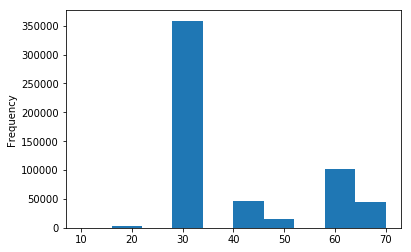

In [16]:
df.loc[:, "Speed_limit"].plot("hist")
plt.show()

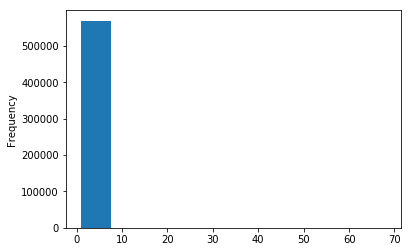

In [17]:
# the typical number of casualties is below 10
#  - which makes sense as most car contains up to 5 people, and usually 2 cars per accidents
df.loc[:, "Number_of_Casualties"].plot("hist")
plt.show()

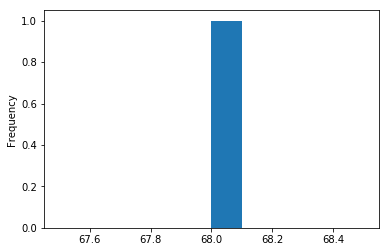

In [18]:
# Let's hunt down some outlier. We have accdients with more than 60 casualties?
df.loc[df.loc[:, "Number_of_Casualties"] > 60, "Number_of_Casualties"].plot("hist")
plt.show()

In [19]:
# take a peek - accident 200743N002017: 1 vehical, 68 casualties. This could be a coach.
df.loc[df.loc[:, "Number_of_Casualties"] > 60, ["Accident_Index", "Number_of_Casualties"]]

,Accident_Index,Number_of_Casualties
505876,200743N002017,68


In [20]:
# See more columns
df.loc[df.loc[:, "Number_of_Casualties"] > 60, :]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
505876,200743N002017,504450.0,178700.0,-0.496697,51.497547,43,1,1,68,03/01/2007,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,2,Yes,E01017829,2007


Also take a look at this [BBC app](http://www.bbc.co.uk/news/uk-15975720)

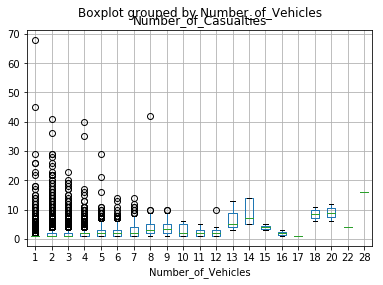

In [21]:
# Box plot! We expect to see on average (within 25-75 percentile range box), 
# more vehicles = more casualties (the boxes)
# all the dots are outliers
df.boxplot(column="Number_of_Casualties", by="Number_of_Vehicles")

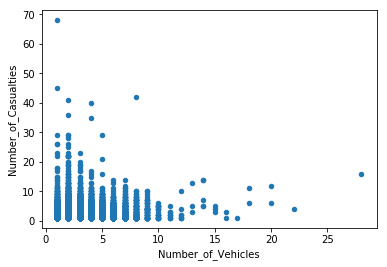

In [22]:
# Scatter plot! We expect to see on average, more vehicles = more casualties (the boxes)
# all the dots are outliers
df.plot.scatter(x="Number_of_Vehicles", y="Number_of_Casualties")
plt.show()

More info on plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

```
df.plot(kind="...")
```

Note: use scatter vs boxplot accordingly:

- when x = numeric, y = numeric, use scatter
- when x = categorial, y = numeric, use boxplot

What if we have outlier?

- df <- keep everything
- df_subset <- df but with outliers removed

In [23]:
# Recall: single bracket pair returns a Pandas Series
type(df.loc[:, "Number_of_Casualties"])

pandas.core.series.Series

In [25]:
# Recall: double bracket pair returns a Pandas DataFramne
type(df.loc[:, ["Number_of_Casualties"]])

pandas.core.frame.DataFrame

In [26]:
# Recall: double bracket pair returns a Pandas DataFramne - multi columns this time
type(df.loc[:, ["Number_of_Casualties", "Number_of_Vehicles"]])

pandas.core.frame.DataFrame